In [1]:
# Date: 02 March 2024
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("../datasets/nasdaq100.csv", sep=";")
data

data = data.drop(columns = ["Date"], axis="columns")

data

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Starting (USD)    16195.833333
dtype: float64

Text(0.5, 0, 'Starting US')

Text(0, 0.5, 'Ending US')

Text(0.5, 1.0, 'Stock Price')

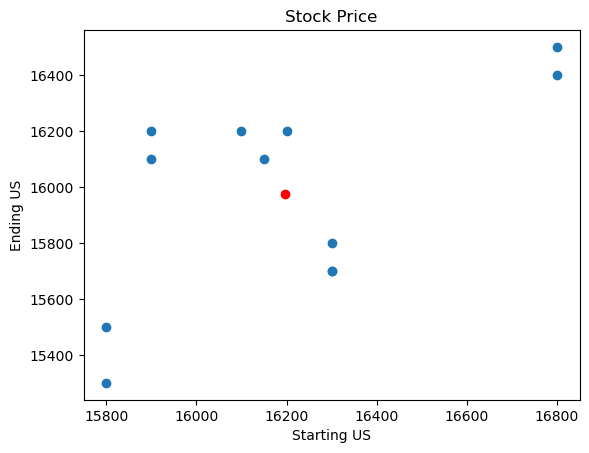

In [41]:

x = data[["Starting (USD)"]]
y = data[["Ending (USD)"]]


x.mean()
plt.scatter(x.mean(), y.mean(), color="red")
plt.scatter(x, y)
plt.xlabel("Starting US")
plt.ylabel("Ending US")
plt.title("Stock Price")
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state = 3)

reg = LinearRegression()

model = reg.fit(xtrain, ytrain)

reg.intercept_
reg.coef_


predict = reg.predict([[16700]])
print("Predict", predict)

score = reg.score(xtest, ytest)
print(score*100,'%')

array([3107.26495726])

array([[0.79487179]])

Predict [[16381.62393162]]
-6.015112745882134 %


/home/ahmad/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16511.114958
1,15900,16100,15819.909972
2,15800,15300,15743.109418
3,16100,16200,15973.511080
4,16300,15700,16127.112188


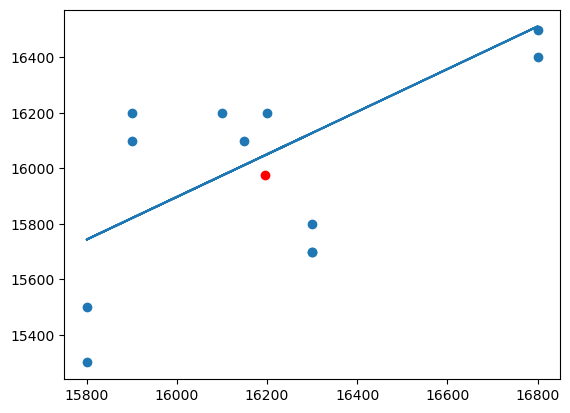

In [63]:
data["predicted_y"] = reg.predict(x)
data.head()
plt.scatter(x, y)
plt.plot(x, data["predicted_y"])
plt.scatter(x.mean(), y.mean(), color="red")
plt.show()